<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [139]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display
import plotly.graph_objs as go


# улучшаем визуализацию в ноутбуке
%matplotlib inline
plt.style.use('default')

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [140]:
# считывание датасета и выявление его размерности
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
display(hh_df.shape)

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [141]:
# вывод первых трёх строк датасета
display(hh_df.head(10))
display(hh_df.tail(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
5,"Мужчина , 29 лет , родился 5 октября 1989",25000 руб.,Технический специалист,"Старый Оскол , не готов к переезду , не готов ...",полная занятость,"полный день, сменный график",Опыт работы 9 лет 9 месяцев Технический специ...,Комбинат хлебопродуктов Старооскольский,Слесарь КИПиА,Неоконченное высшее образование 2013 Воронежс...,22.04.2019 15:59,Имеется собственный автомобиль
6,"Мужчина , 46 лет , родился 19 сентября 1972",250000 руб.,Руководитель ИТ-проектов,"Москва , не готов к переезду , готов к редким ...",полная занятость,полный день,Опыт работы 22 года 9 месяцев Руководитель ИТ...,"СИБИНТЕК, ООО ИК",Менеджер (Руководитель ИТ-проектов),Высшее образование 2008 ФГОУ ВПО «Уральская ак...,25.04.2019 22:48,Не указано
7,"Мужчина , 29 лет , родился 9 июля 1989",70000 руб.,Инженер АСУ ТП,"Москва , м. Бульвар Рокоссовского , готов к п...",полная занятость,полный день,Опыт работы 3 года 11 месяцев Декабрь 2016 — ...,ФМ-инжиниринг,Инженер АСУ ТП,Высшее образование 2014 Белорусская Государств...,07.05.2019 17:59,Не указано
8,"Мужчина , 29 лет , родился 11 июля 1989",65000 руб.,Ревизор,"Москва , м. Шоссе Энтузиастов , готов к перее...",полная занятость,полный день,Опыт работы 8 лет 9 месяцев Декабрь 2016 — по...,ФГБУ РСВО,Старший специалист,Неоконченное высшее образование 2020 Московск...,11.04.2019 11:08,Имеется собственный автомобиль
9,"Мужчина , 34 года , родился 26 мая 1984",55000 руб.,"Менеджер по работе с клиентами, Pre-sale менед...","Москва , м. Теплый Стан , не готов к переезду...",полная занятость,полный день,Опыт работы 16 лет 6 месяцев Июнь 2018 — по н...,"ООО ""Мираском""",Специалист отдела ИТ,Высшее образование 2007 Московский государств...,19.04.2019 11:39,Имеется собственный автомобиль


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [142]:
# вывод основной информации о числе непустых значений в признаках и их типах в таблице
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

5. Выведите основную статистическую информацию о столбцах.


In [143]:
# вывод основной статистической информации о признаках
display(hh_df.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [144]:
# Преобразуем признак "Образование и ВУЗ".
# Выделяем 4 уровня образования: «высшее», «неоконченное высшее», «среднее специальное» и «среднее»
# Преобразованную информацию заносим в новый признак "Образование", признак "Образование и ВУЗ" удалим
def get_education(arg):
    """Функция определяет уровень образования по входным данным

    Args:
        arg (str): строка, содержащая уровен образования из признака "Образование и ВУЗ"
    
    Returns:
        (str): уровень образования по одной из четырех возмежных групп «высшее», «неоконченное высшее», «среднее специальное» и «среднее»
    """
    arg = arg.split(' ', 2)
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное' and 'высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее' and 'специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее' in arg:
        return 'среднее'
    else:
        pd.NA
        
# Создаем новый признак "Образование" и удаляем признак "Образование и ВУЗ"
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education)

# Проверяем по уникальным значениям
display(hh_df['Образование'].unique())

# Подсчитываем кол-ва значений по каждой группе
display(hh_df['Образование'].value_counts())

# Проверка произведена, признак "Образование и ВУЗ" можно удалить
hh_df = hh_df.drop(columns='Образование и ВУЗ', axis=1)

# Проверяем удаление признака
#display(hh_df.info())

display(f"Средний уровень образования (школьное образование) имеет {hh_df['Образование'].value_counts().loc['среднее']} соискателей")

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

'Средний уровень образования (школьное образование) имеет 559 соискателей'

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [145]:
# Создаём два новых признака "Пол" и "Возраст"
# Решение: пишем две функции для извлечения сведений о половой принадлежности соискателя и о его возрасте из признака "Пол, возраст"
# Удаляем признак "Пол, возраст"

def get_gender(arg):
    """Функция определяет половую принадлежность соискателя по входным данным

    Args:
        arg (str): строка, содержащая сведения о половой принадлежности и возрасте соискателя
    
    Returns:
        (str): значение пола соискателя ('М' - мужчина, 'Ж' - женщина)
    """
    if 'Мужчина' in arg:
        return 'М'
    else:
        return 'Ж'
    
def get_age(arg):
    """Функция определяет возраста соискателя по входным данным

    Args:
        arg (str): строка, содержащая сведения о половой принадлежности и возрасте соискателя
    
    Returns:
        (int): значение возраста соискателя ('М' - мужчина, 'Ж' - женщина)
    """
    age = arg.replace(',', ' ').split()
    
    return int(age[1])

# Создаем новые признаки "Пол" и "Возраст"
hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_gender)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_age)

# Удаляем признак "Пол, возраст"
hh_df = hh_df.drop(columns = 'Пол, возраст', axis = 1)

#  Доля (процент) женских резюме 
display(f"Женских резюме представлено {round(hh_df['Пол'].value_counts(normalize=True).loc['Ж']*100, 2)} %")

# Средний возраст соискателей
display(f"Средний возраст соискателей составляет {round(hh_df['Возраст'].mean(), 2)} года")


#hh_df.info()
#hh_df['Возраст'].mean()

'Женских резюме представлено 19.07 %'

'Средний возраст соискателей составляет 32.2 года'

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [146]:
# Создаём новый признак "Опыт работы (месяц)"
# Решение: пишем функцию, которая преобразует опыт работы в месяцы, используя признак "Опыт работы"
# Удаляем признак "Опыт работы"

def get_exper(arg):
    """Функция преобразует опыт работы в месяцы

    Args:
        arg (str): строка, содержащая опыт работы в месяцах и в годах + месяцах
    
    Returns:
        (int): значение опыта работы в месяцах
    """
    # Ищем пропуски в значениях и возращаем NaN
    '''if arg is np.nan or arg == 'Не указано':
        return np.nan''' # данная форма записи вызвала ошибку на задании 5.2, нашлось 170, а не 168 пропусков
        
    if arg is np.nan:
        return np.nan
    if arg == 'Не указано':
        return np.nan    
    
    # Преобразуем опыт
    key_year = ['год', 'года', 'лет']
    key_month = ['месяц', 'месяца', 'месяцев']
    arg_split = arg.split(' ', 6)
    cnt_years = 0
    cnt_months = 0
    
    for index, values in enumerate (arg_split):
        
        if values in key_year:
            cnt_years = int(arg_split[index-1])
        
        if values in key_month:
            cnt_months = int(arg_split[index-1])
    
    return int(cnt_years*12 + cnt_months)

# Создаем новый признак "Опыт работы (месяц)"
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_exper)

# Удаляем признак "Опыт работы"
hh_df = hh_df.drop(columns = 'Опыт работы', axis = 1)

# Вычисляем медианное значение опыта работы (в месяцах)
display(f"Медианный опыт работы (в месяцах) составляет {hh_df['Опыт работы (месяц)'].median()} месяцев")


'Медианный опыт работы (в месяцах) составляет 100.0 месяцев'

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [147]:
# Создаём отдельные признаки "Город", "Готовность к переезду", "Готовность к командировкам". 
# Решение: пишем три функции для перераспределения городов по 4 группам и для определния готовности к командировкам и третья для готовности к переездам
# Удаляем признак "Город, переезд, командировки"

def get_city(arg):
    """Функция извлекает и перераспределяет города: Санкт-Петербург, Москва, город-миллионник, другие 

    Args:
        arg (str): строка из признака "Город, переезд, командировки"
    
    Returns:
        (str): возвращает одно из четрых значений городов
    """
    # Список городов миллионников
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                      ]
    
    city = arg.split(' , ')[0]
    if (city == 'Санкт-Петербург') or (city == 'Москва'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'

def get_to_move(arg):
    """Функция извлекает информацию о готовности к переезду

    Args:
        arg (str): строка из признака "Город, переезд, командировки"
    
    Returns:
        (str): возвращает информацию о готовности к переезду
    """
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

def get_to_trip(arg):
    """Функция извлекает информацию о готовности к командировкам

    Args:
        arg (str): строка из признака "Город, переезд, командировки"
    
    Returns:
        (str): возвращает информацию о готовности к командировкам
    """
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else:
            return True
    else:
        return False
    
# Создаём новый признак "Город"
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)

# Создаём новый признак "Готовность к переезду"
hh_df['Готовность к переездам'] = hh_df['Город, переезд, командировки'].apply(get_to_move)

# Создаём новый признак "Готовность к командировкам"
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_to_trip)

# Удаляем ненужный признак
hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

# Вычисляем долю проживающих в СПб
display(f"В Санкт-Петербурге проживает {round(hh_df['Город'].value_counts(normalize=True).loc['Санкт-Петербург'] * 100)} % соискателей")

#Вычисляем долю гтовых к командировкам и переездам
mask = hh_df['Готовность к переездам'] & hh_df['Готовность к командировкам']
display(f"К переездам и командировкам готовы {round(hh_df[mask].count()[1] / hh_df.shape[0] * 100)} % соискателей")

'В Санкт-Петербурге проживает 11 % соискателей'

'К переездам и командировкам готовы 32 % соискателей'

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [148]:
# Создаём признаки-мигалки для желаемой занятости и желаемого графика работы (через lambda-функцию)

# список видов занятости
work_employ = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']

# список графиков работы
work_shedule = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']

for i in work_employ:
    hh_df[i] = hh_df['Занятость'].apply(lambda x: True if i in x else False)
    
for i in work_shedule:
    hh_df[i] = hh_df['График'].apply(lambda x: True if i in x else False)

# Удаляем признаки "Занятость" и "График"
hh_df = hh_df.drop('Занятость', axis=1)
hh_df = hh_df.drop('График', axis=1)

display(f"Проектную работу и волонтёрство ищут {hh_df[hh_df['проектная работа'] & hh_df['волонтерство']].shape[0]} соискателей")
display(f"Графики вахтовый метод и гибкий график {hh_df[hh_df['вахтовый метод'] & hh_df['гибкий график']].shape[0]} соискателей")
#hh_df.info()

'Проектную работу и волонтёрство ищут 436 соискателей'

'Графики вахтовый метод и гибкий график 2311 соискателей'

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [149]:
# Отражаем желаемую зарплату в рублях в соответствии с курсом валют
# Пишем две функции для выделения численной части в зарплате и во второй преобразуем название валют в соответсвии со стандартами
# В сетах признаки связанные с датами приводим к единообразию, далее соединим таблицы в соответствии с датами и видам валют

def get_salary(arg):
    """Функция извлекает численную часть ЗП

    Args:
        arg (str): строка из признака "ЗП"
    
    Returns:
        (float): возвращает численное значение зарплаты
    """
    salary_float = float(arg.split(' ')[0])
    return salary_float


def currency_iso(arg):
    """Функция преобразует наименование валют в соответствии с ISO

    Args:
        arg (str): строка, в которой содержится сведения о валюте
    
    Returns:
        (str): наименование валюты по ISO
    """
    dictionary_iso = {
        'грн' : 'UAH', 'USD' : 'USD', 'EUR' : 'EUR', 'белруб' : 'BYN',
        'KGS' : 'KGS', 'сум' : 'UZS', 'AZN' : 'AZN', 'KZT' : 'KZT'
    }
    iso = arg.split(' ')[1].replace('.', '')
    if iso == 'руб':
        return 'RUB'
    else:
        return dictionary_iso[iso]
    
# Считываем сет с валютами и преобразуем дату с помощью datetime
Exchange_df = pd.read_csv('data\ExchangeRates.csv')
Exchange_df['date'] = pd.to_datetime(Exchange_df['date']).dt.date

# Признак "Обновление резюме" приобразуем с помощью datetime
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.date

# Для объединения таблиц создадим два врменных признака и применим к ним функции выше
hh_df['ЗП временный'] = hh_df['ЗП'].apply(get_salary)
hh_df['Валюта временный'] = hh_df['ЗП'].apply(currency_iso)

# Обединяем таблицы
join_df = hh_df.merge(
    Exchange_df,
    how='left',
    left_on=['Валюта временный', 'Обновление резюме'],
    right_on=['currency', 'date'],
)

# Заполняем пропуски 1
join_df['close'] = join_df['close'].fillna(1)
join_df['proportion'] = join_df['proportion'].fillna(1)

# Создаем новый признак зарплаты в рублях "ЗП (руб)"
hh_df['ЗП (руб)'] = join_df['close'] * join_df['ЗП временный'] / join_df['proportion']

# Удаляем пременные признаки и признак "ЗП"
hh_df = hh_df.drop(['ЗП', 'ЗП временный', 'Валюта временный'], axis=1)

# Вычисляем желаемую медианную заработную плату соискателей 
display(f"Медианная заработная плата составляет {round(hh_df['ЗП (руб)'].median() / 1000)} т. рублей")

'Медианная заработная плата составляет 59 т. рублей'

In [150]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переездам           44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

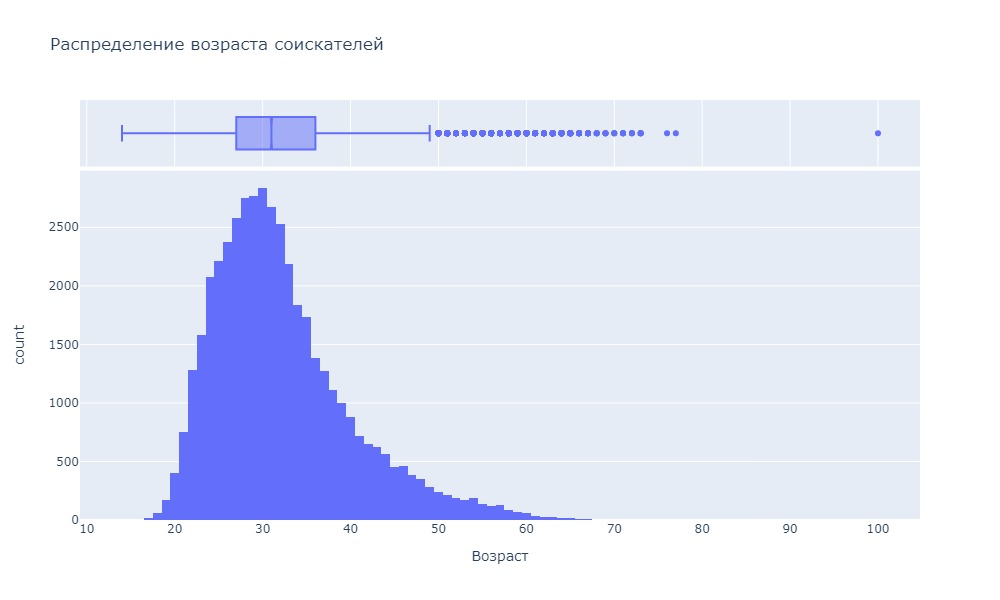

In [151]:
# Строим две диаграммы друг под другом: коробчатую и гистограмму.

fig = px.histogram(
    data_frame=hh_df,
    x='Возраст',
    title='Распределение возраста соискателей',
    width=1000,
    height=600,
    marginal='box',
)
fig.show('jpg')

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

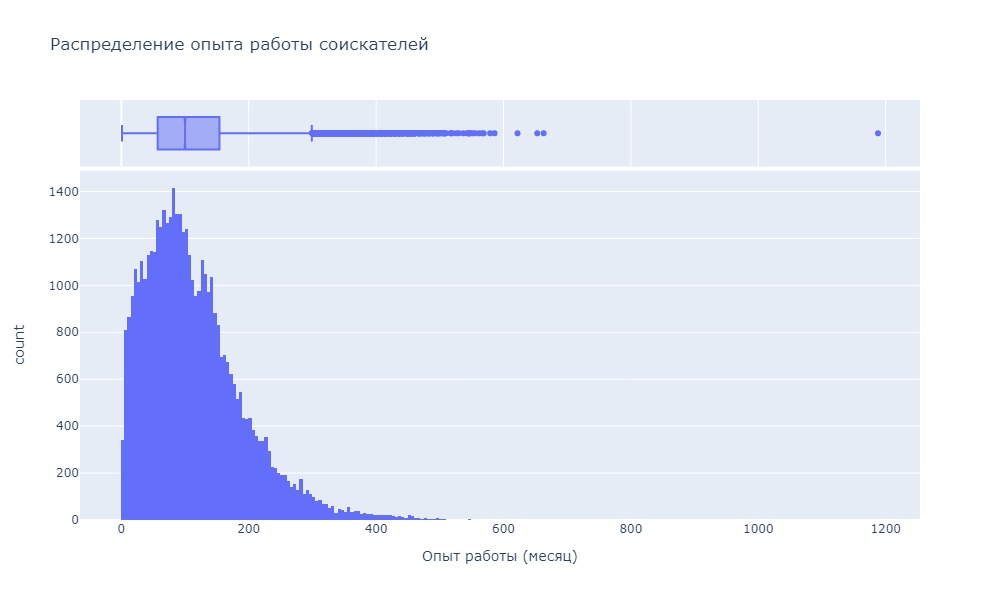

In [152]:
# Строим две диаграммы друг под другом: коробчатую и гистограмму.

fig = px.histogram(
    data_frame=hh_df,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы соискателей',
    width=1000,
    height=600,
    marginal='box',
)
fig.show('jpg')

Мода графика смещена в лево.
<br>Мода распределения равна 80-84 месяца
<br>Предельные значения признака по коробчатой гистограмме: мин. 1 месяц, макс. 1188 месяцев (99 лет)
<br>Большинство сосискателей имеет возраст от 27 до 36 лет
<br>Опыт работы большинства соискателей находится в интервале от 1 до 300 месяцев (25 лет) (по коробчатой диаграмме)
<br>Коробчатая диаграмме показывает, что выброс начинается со значения 300 месяцев (25 лет). В принципе это подкрепляет утверждение на предыдущей диаграмме. После Spectrum появляются i386 примерно 1993 год. Т.е. первые специалисты получившие массовое "айтишное" образование появились в районе 1997 года, что составляет 25 лет до сегодняшнего дня.
<br>Так же явная аномалия видна в правой части диаграммы 1188 месяцев

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


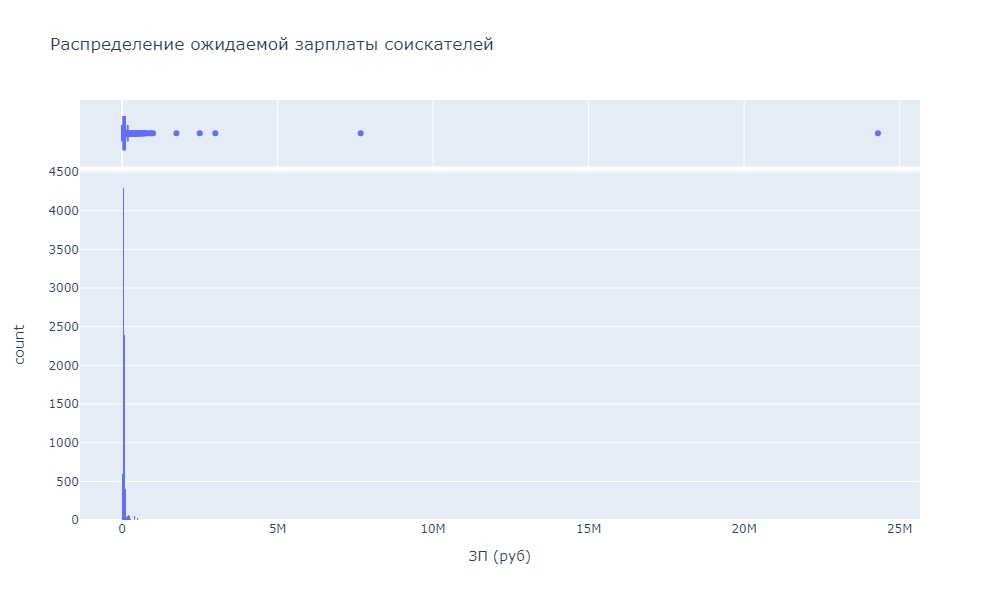

In [153]:
# Строим две диаграммы друг под другом: коробчатую и гистограмму.

# для просмотра ЗП до миллиона преобразуем наш сет в hh_df_mini - заэкранированные строки
#hh_df_mini = hh_df[hh_df['ЗП (руб)']<1e6]
fig = px.histogram(
    #data_frame=hh_df_mini,
    data_frame=hh_df,
    x='ЗП (руб)',
    title='Распределение ожидаемой зарплаты соискателей',
    width=1000,
    height=600,
    marginal='box',
)
fig.show('jpg')

Из-за резкого выброса диаграммы сместились влево. Правильнее было бы удалить данное значение из таблицу.
<br>Предельные признаки значения по зарплате мин. 1 рубль, макс. 24 млн руб.
<br>Интервал ЗП большинства соискателей от 37 т.р. до 181 т.р.
<br>Аномальные  значение 1 рубль и 25 млн руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

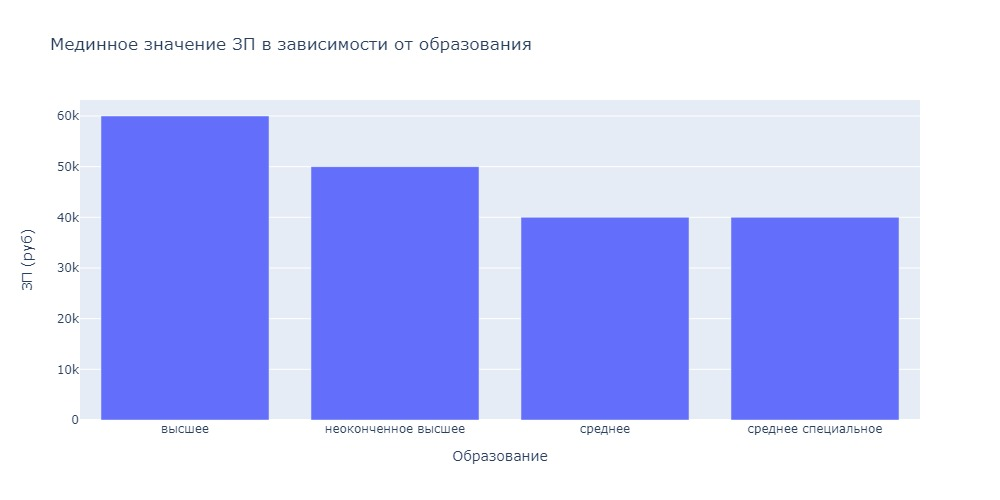

In [154]:
# перед визуализацией преобразуем признак ЗП, т.е. отфильтруем ЗП до 1 млн руб.
# строим столбчатую диаграмму для визуализации зависимости уровня ЗП от уровня образования

hh_df_mini = hh_df[hh_df['ЗП (руб)']<1e6].groupby('Образование', as_index=False).median()
fig = px.bar(
    data_frame=hh_df_mini,
    x='Образование',
    y='ЗП (руб)',
    width=1000,
    title='Мединное значение ЗП в зависимости от образования'
)
fig.show('jpg')

Наибольшей уровень желаемой заработной платы наблуюдается у специалистов с высшим образование.
<br>Средний уровень у соискателей с неоконченным высшим образование
<br> Наименьший ровень у сосикателей со средним и средним специальным образованием.
<br>Распределение ожидаемой, т.к. сосискатели и повышают уровень образования ради более высоких ЗП.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

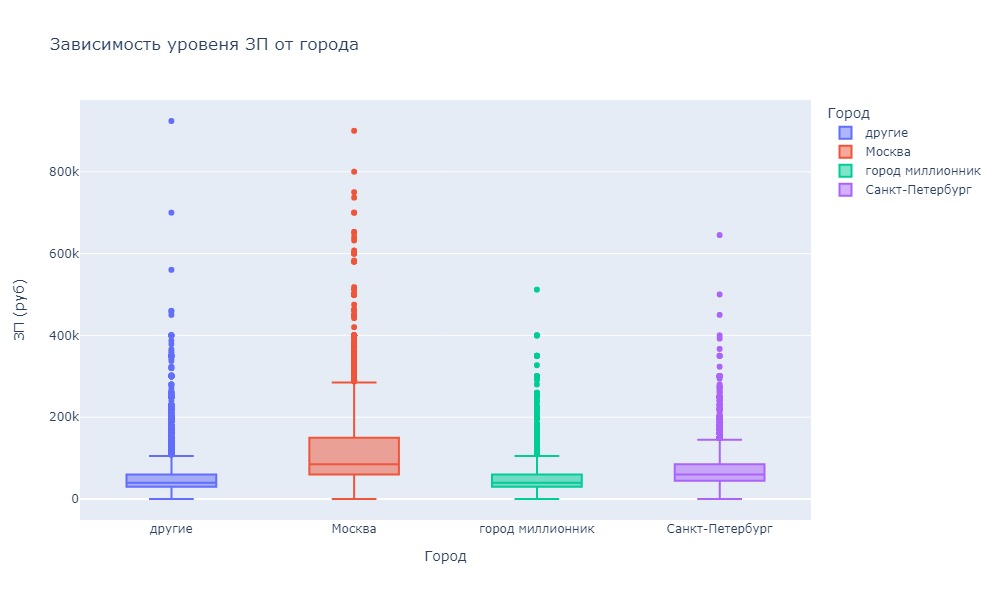

In [155]:
# перед визуализацией преобразуем признак ЗП, т.е. отфильтруем ЗП до 1 млн руб.
# строим коробчатую диаграмму для визуализации зависимости уровня ЗП от городов

hh_df_mini = hh_df[hh_df['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=hh_df_mini,
    x='Город',
    y='ЗП (руб)',
    width=1000,
    height=600,
    color='Город',
    title='Зависимость уровеня ЗП от города'
)
fig.show('jpg')

Из диаграммы видно, что медианный уровень желаемой ЗП в Москве самый высокий медиана - 85 т.р., размах до 285 т.р.
<br>На втором месте Санкт-Петербург, медиана 60 т.р., размах до 145 т.р.
<br>Города миллионники и другие примерно одинаковы, медиана 40 т.р., размах до 60 т.р.
Как и следовало ожидать, что в Москве рынок труда самый дорогой, Санкт-Петербург на втором месте. Медиана по Москве в полтора раза, размах в два раза больше, чем в СПб.
<br>Наблюдаются выбросы, скорей всего это связано с запросами по ЗП в разных валютах.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

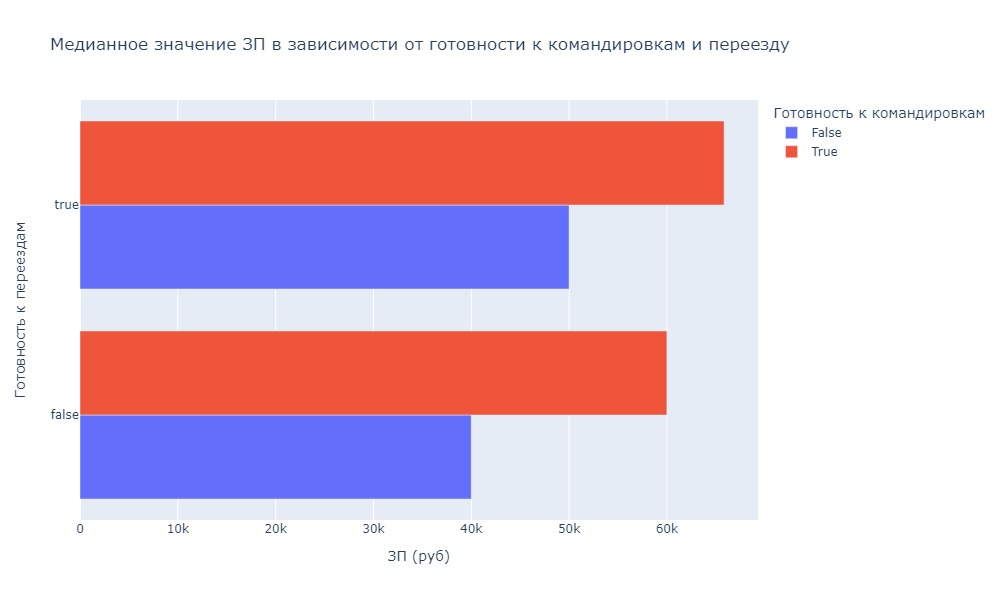

In [156]:
# Преобразуем сет - группируем по готовности к переезду и готовности к командировкам
# Сравниваем медианные значения ЗП

hh_df_group = hh_df.groupby(['Готовность к командировкам', 'Готовность к переездам'], as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=hh_df_group,
    x='ЗП (руб)',
    y='Готовность к переездам',
    barmode='group',
    color='Готовность к командировкам',
    orientation='h',
    width=1000,
    height=600,
    title='Медианное значение ЗП в зависимости от готовности к командировкам и переезду'
)

fig.show('jpg')

Из диаграммы видно, что сосикатели готовые к командировкам и к переездам желают большей ЗП, чем сосикатели готовые только к командировкам.
Низкий уроыень желаемой ЗП желают сосискатели не готовые к командировкам и переездам.


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

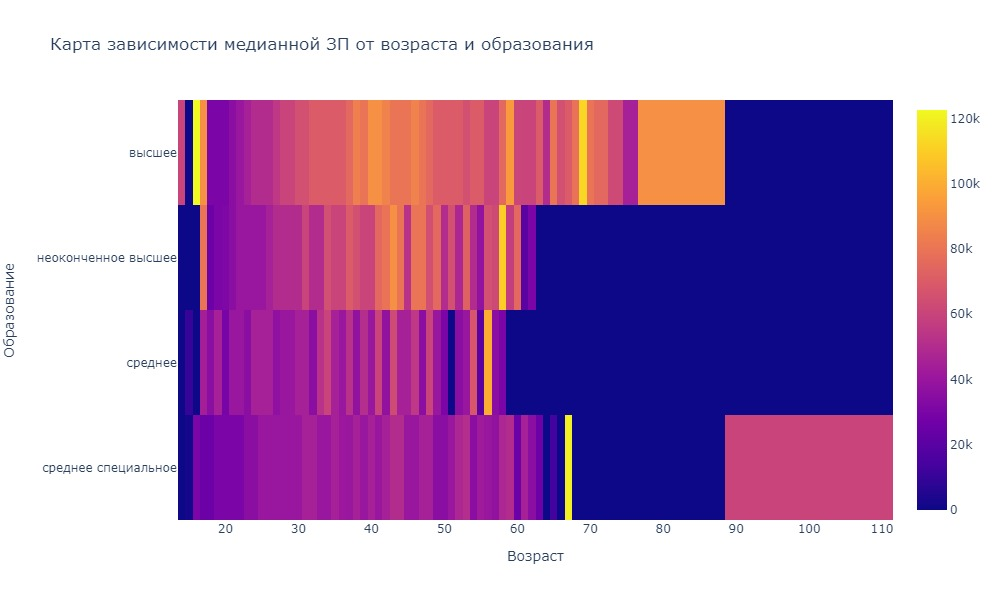

In [157]:
# Преобразуем сет в сводную таблицу и строим тепловую диаграмму

# Построение сводной таблицы
hh_df_pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)

# Построение тепловой карты
fig = px.imshow(
    hh_df_pivot,
    width=1000,
    height=600,
    title='Карта зависимости медианной ЗП от возраста и образования'
)

fig.show('jpg')

На карте видна тенденция повышения планки желаемой ЗП в зависимости от возраста, особенно это хорошо видноу группы соискателей с высшим и неоконченным высшим образованием.
<br> Быстрый карьерный рост наблюдается у группы соискателей с высшим образованием
<br>Видны аномалии: верзний-левый угол - запрос ЗП 120т.р. в 16 лет, нижний правый угол - возраст соискателей 90-110 лет, также вверху квадрат показвающий запрос зп в 90 т.р. при возрасте в 77 лет.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

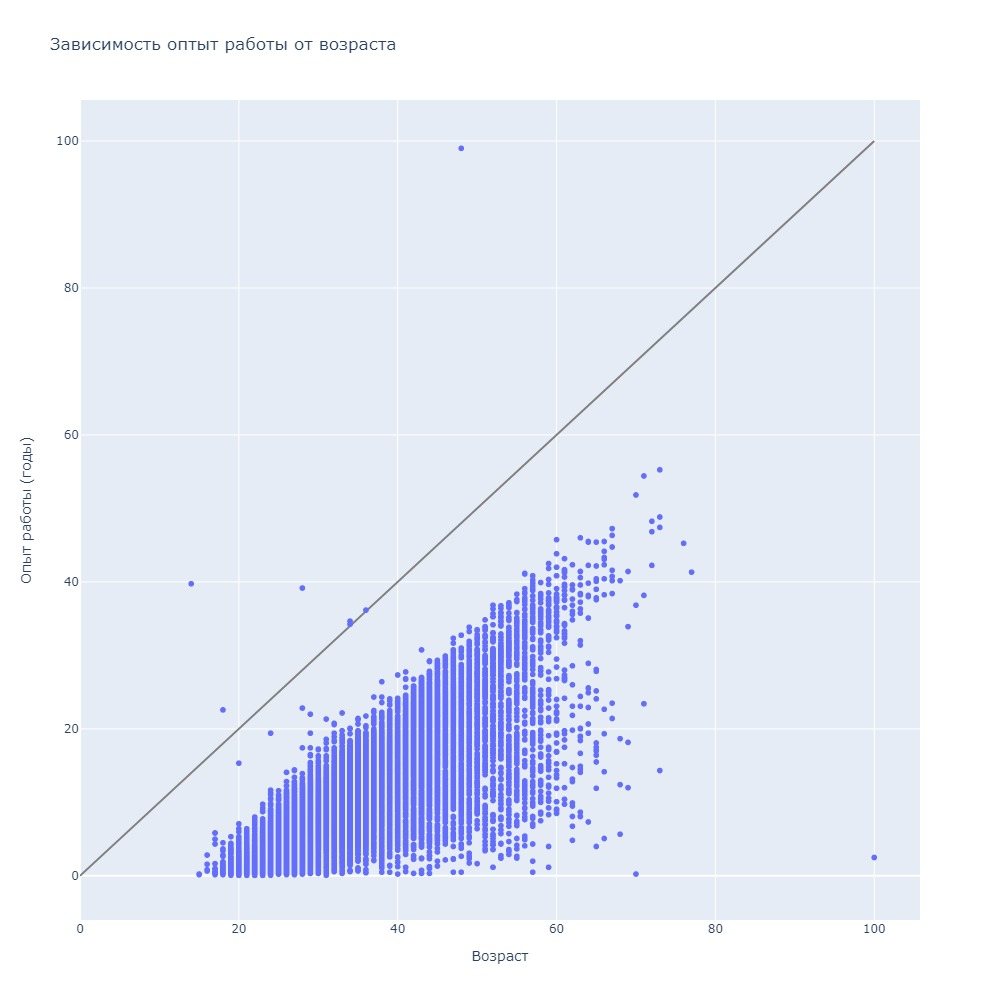

In [158]:
# Строим диаграмму рассеяния Опыт работы от возраста. Опыт работы предварительно переведем в года

# Преобразуем опыт работы в года
hh_df_year = hh_df.copy()
hh_df_year['Опыт работы (годы)'] = hh_df_year['Опыт работы (месяц)']/12

# Строим диаграмму рассеяния
fig = px.scatter(
    data_frame=hh_df_year, 
    y = 'Опыт работы (годы)', 
    x = 'Возраст',
    title = ('Зависимость оптыт работы от возраста'),
    width=1000,
    height=1000,
)

fig.add_scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines',
    line_color='gray',
    showlegend=False
)

fig.show('jpg')

#display(hh_df_year[hh_df_year['Опыт работы (годы)']>= hh_df_year['Возраст']].shape)


На диаграмме видны аномалии такие как 7 случаев, когда опыт работы больше возраста соискателя.
<br> Также видна аномалия с возрастом 100 лет
<br>Наблюдаются сосикатели, котрые начали работать до 18 лет.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [159]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [160]:
# поиск дубликатов
hh_df_dup = hh_df.copy()
dupl = hh_df_dup.duplicated()
display(f'Количество дубликатов - {hh_df_dup[dupl].shape[0]}')


'Количество дубликатов - 161'

In [167]:
#Удаление дубликатов
hh_df_dup.drop_duplicates(inplace=True)
dupl = hh_df_dup.duplicated()

# проверка
hh_df_dup[dupl].shape[0]
hh_df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44583 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44583 non-null  object 
 1   Последнее/нынешнее место работы  44582 non-null  object 
 2   Последняя/нынешняя должность     44581 non-null  object 
 3   Обновление резюме                44583 non-null  object 
 4   Авто                             44583 non-null  object 
 5   Образование                      44583 non-null  object 
 6   Пол                              44583 non-null  object 
 7   Возраст                          44583 non-null  int64  
 8   Опыт работы (месяц)              44415 non-null  float64
 9   Город                            44583 non-null  object 
 10  Готовность к переездам           44583 non-null  bool   
 11  Готовность к командировкам       44583 non-null  bool   
 12  полная занятость  

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [171]:
hh_df_null = hh_df_dup.isnull().sum()
display(hh_df_null[hh_df_null > 0])

Опыт работы (месяц)    168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [174]:
hh_df_dup = hh_df_dup.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_df_dup['Опыт работы (месяц)'] = hh_df_dup['Опыт работы (месяц)'].fillna(hh_df_dup['Опыт работы (месяц)'].median())
display(f"Cреднее значение в столбце «Опыт работы (месяц)» равно {round(hh_df_dup['Опыт работы (месяц)'].mean())}")

'Cреднее значение в столбце «Опыт работы (месяц)» равно 114'

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [164]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [165]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [166]:
# ваш код здесь

ваш коммментарий здесь